In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
from IPython.display import display


In [2]:
df = pd.read_csv('diabetes.csv')
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Stattical analysis

In [3]:
display(df.mean())
display(df.mode())
display(df.median())

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,99,70.0,0.0,0.0,32.0,0.254,22.0,0.0
1,NaN,100,NaN,NaN,NaN,NaN,0.258,NaN,NaN


Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [4]:
desc = df.describe().round(2)
display(desc)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


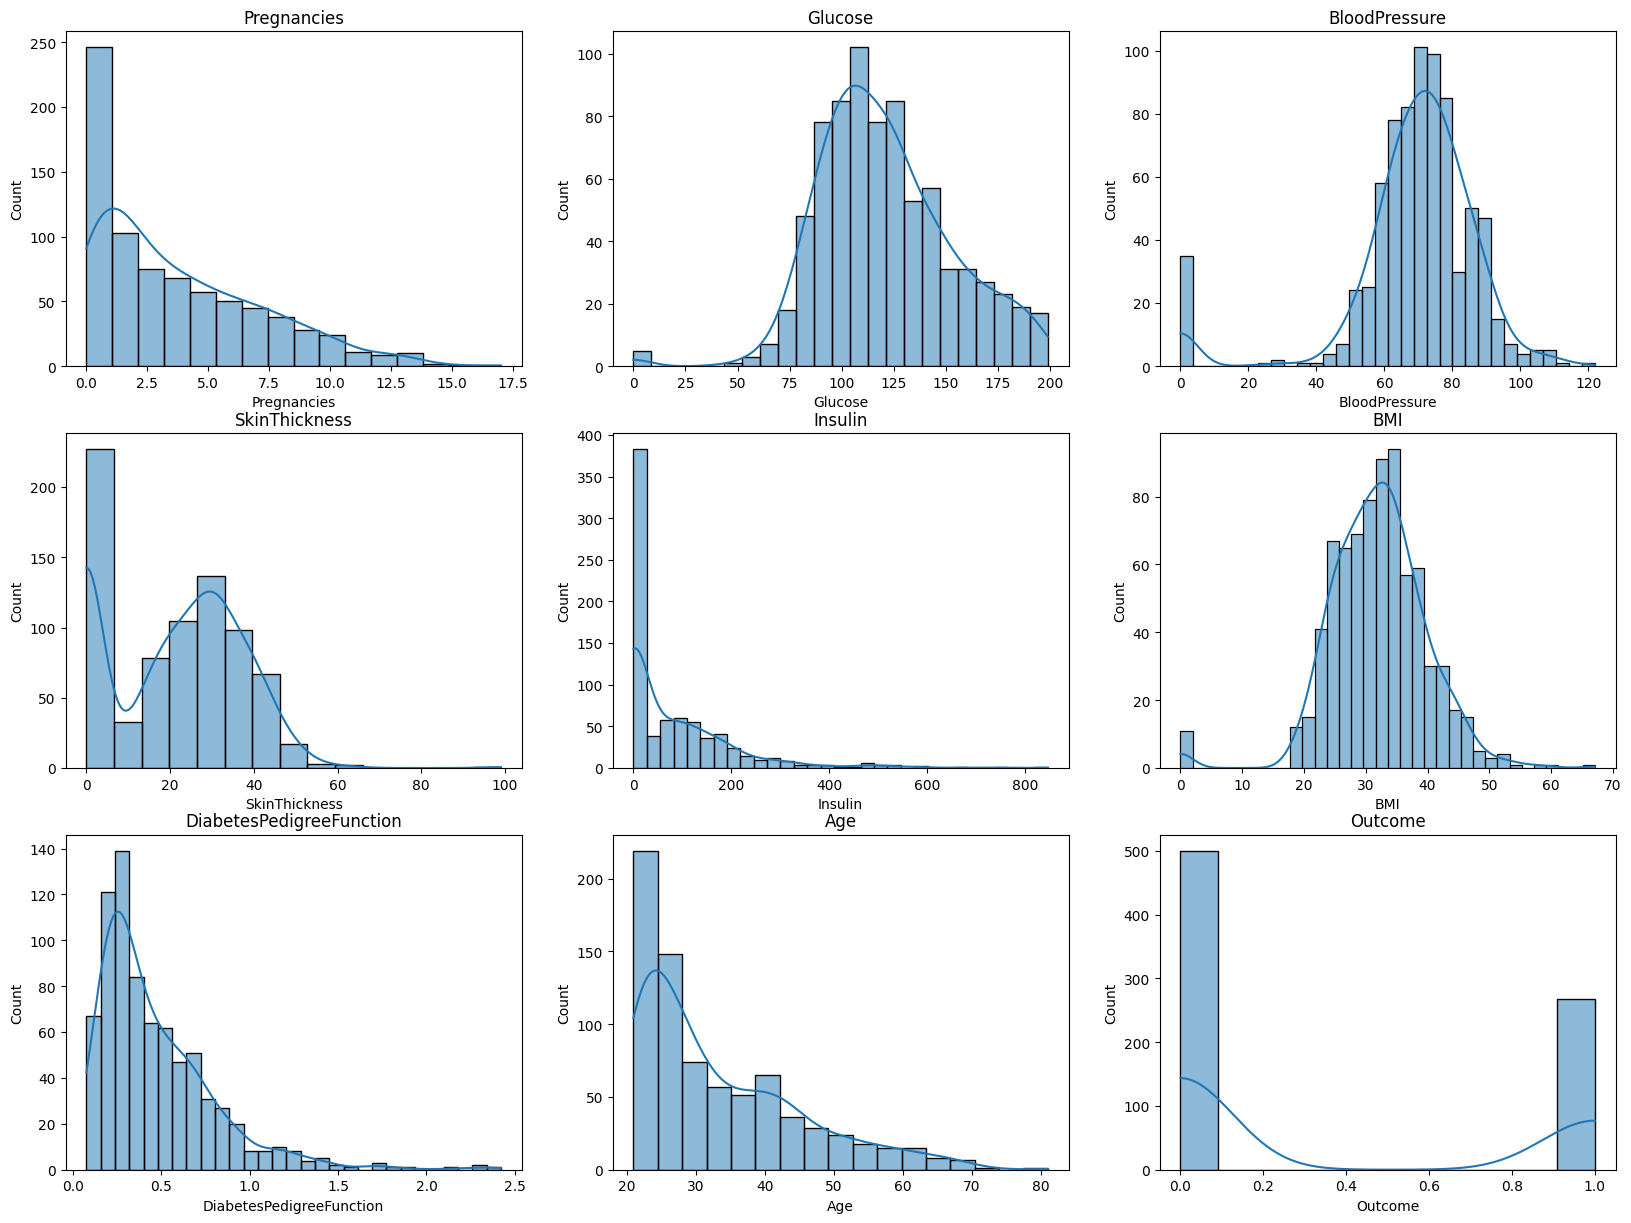

In [5]:
### Plottng distribution
plt.figure(figsize=(20,20))
for i, column in enumerate(df.columns):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(column)

### Correlation

In [9]:
correlation = df.corr().round(2)
display(correlation)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


,Column1,Column2,Pearson_Correlation
6,Pregnancies,Age,0.544341
56,Age,Pregnancies,0.544341
15,Glucose,Outcome,0.466581
65,Outcome,Glucose,0.466581
27,SkinThickness,Insulin,0.436783
...,...,...,...
3,Pregnancies,Insulin,-0.073535
24,SkinThickness,Pregnancies,-0.081672
2,Pregnancies,SkinThickness,-0.081672
30,SkinThickness,Age,-0.113970


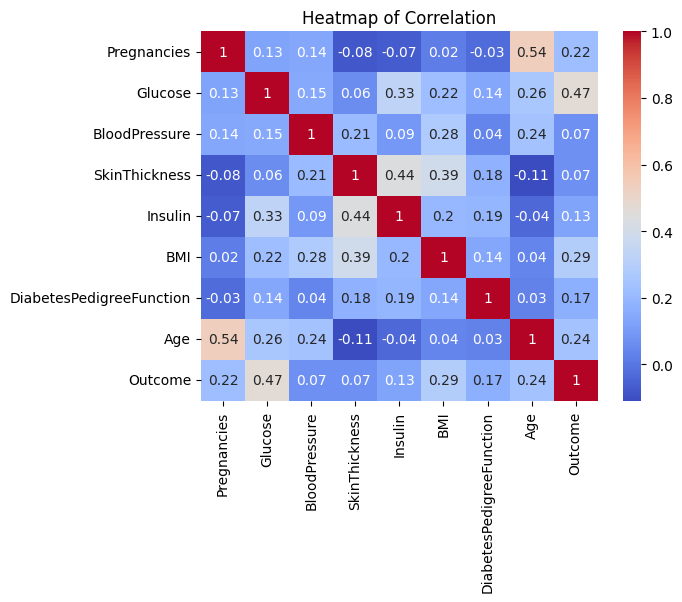

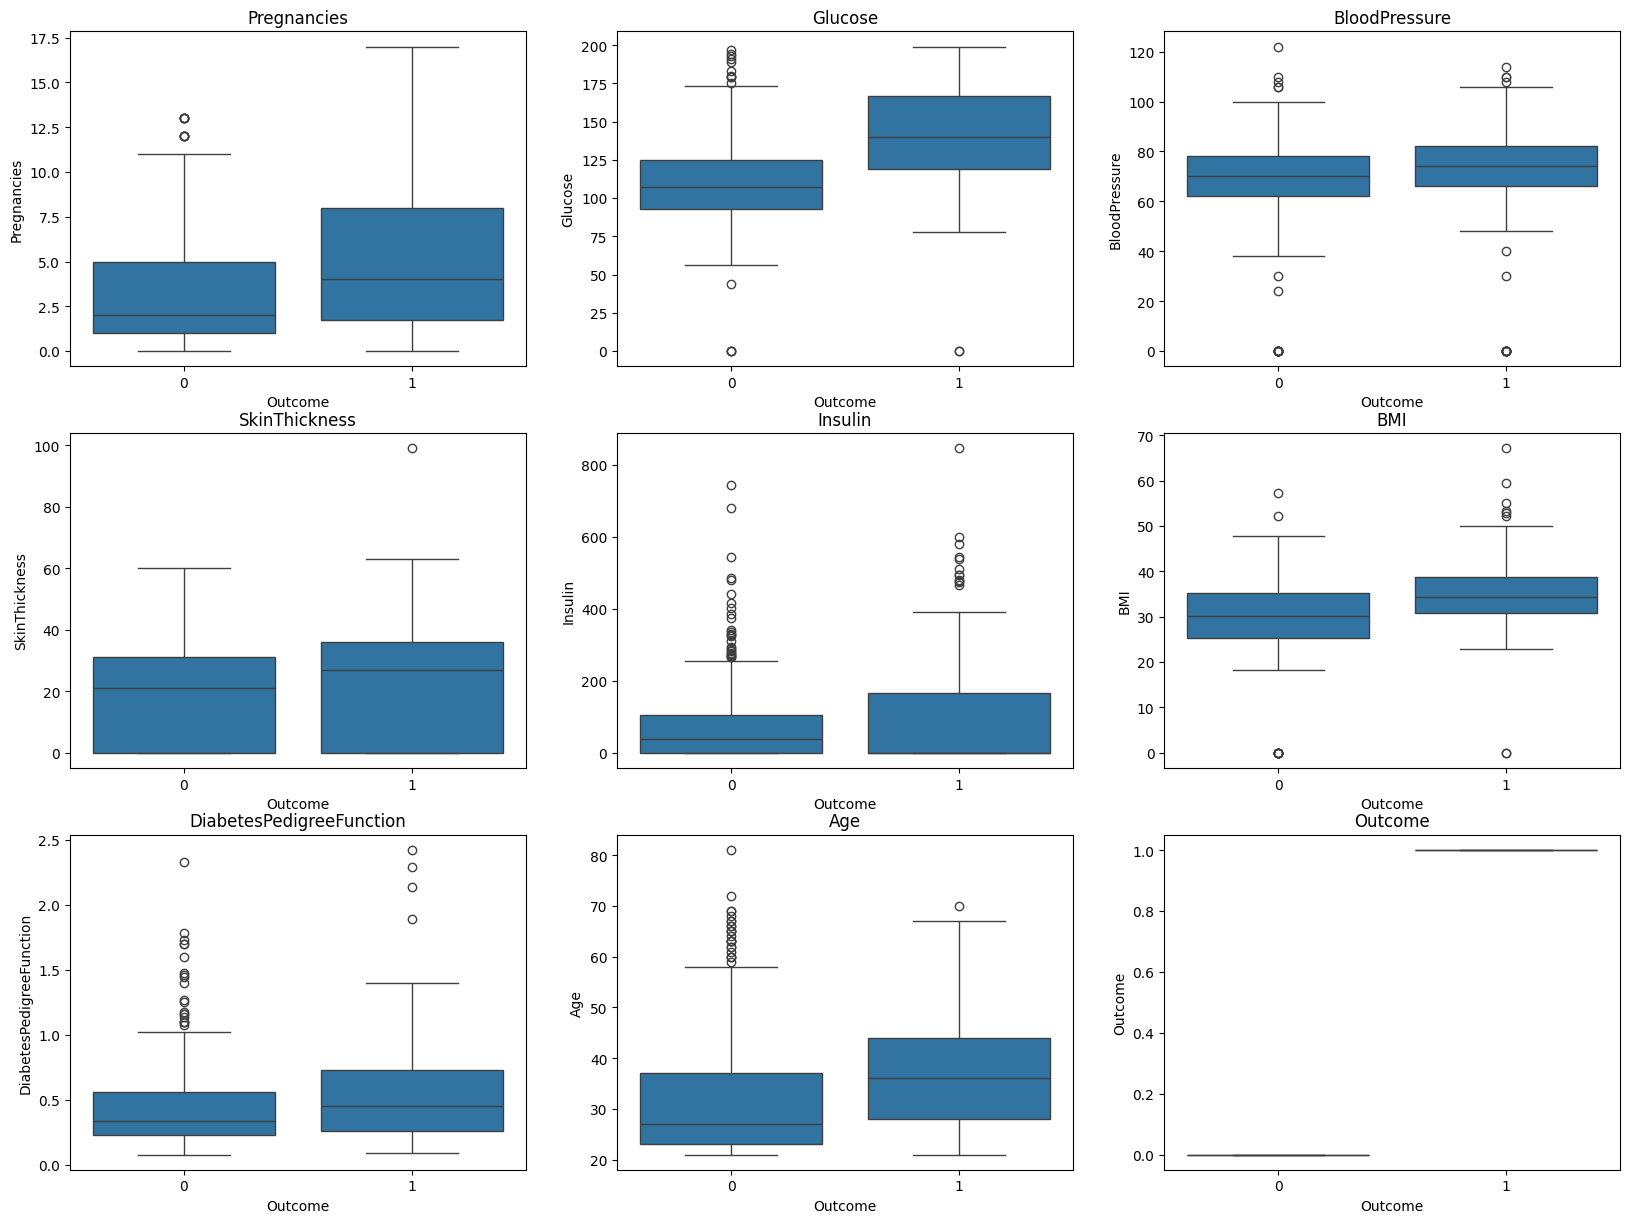

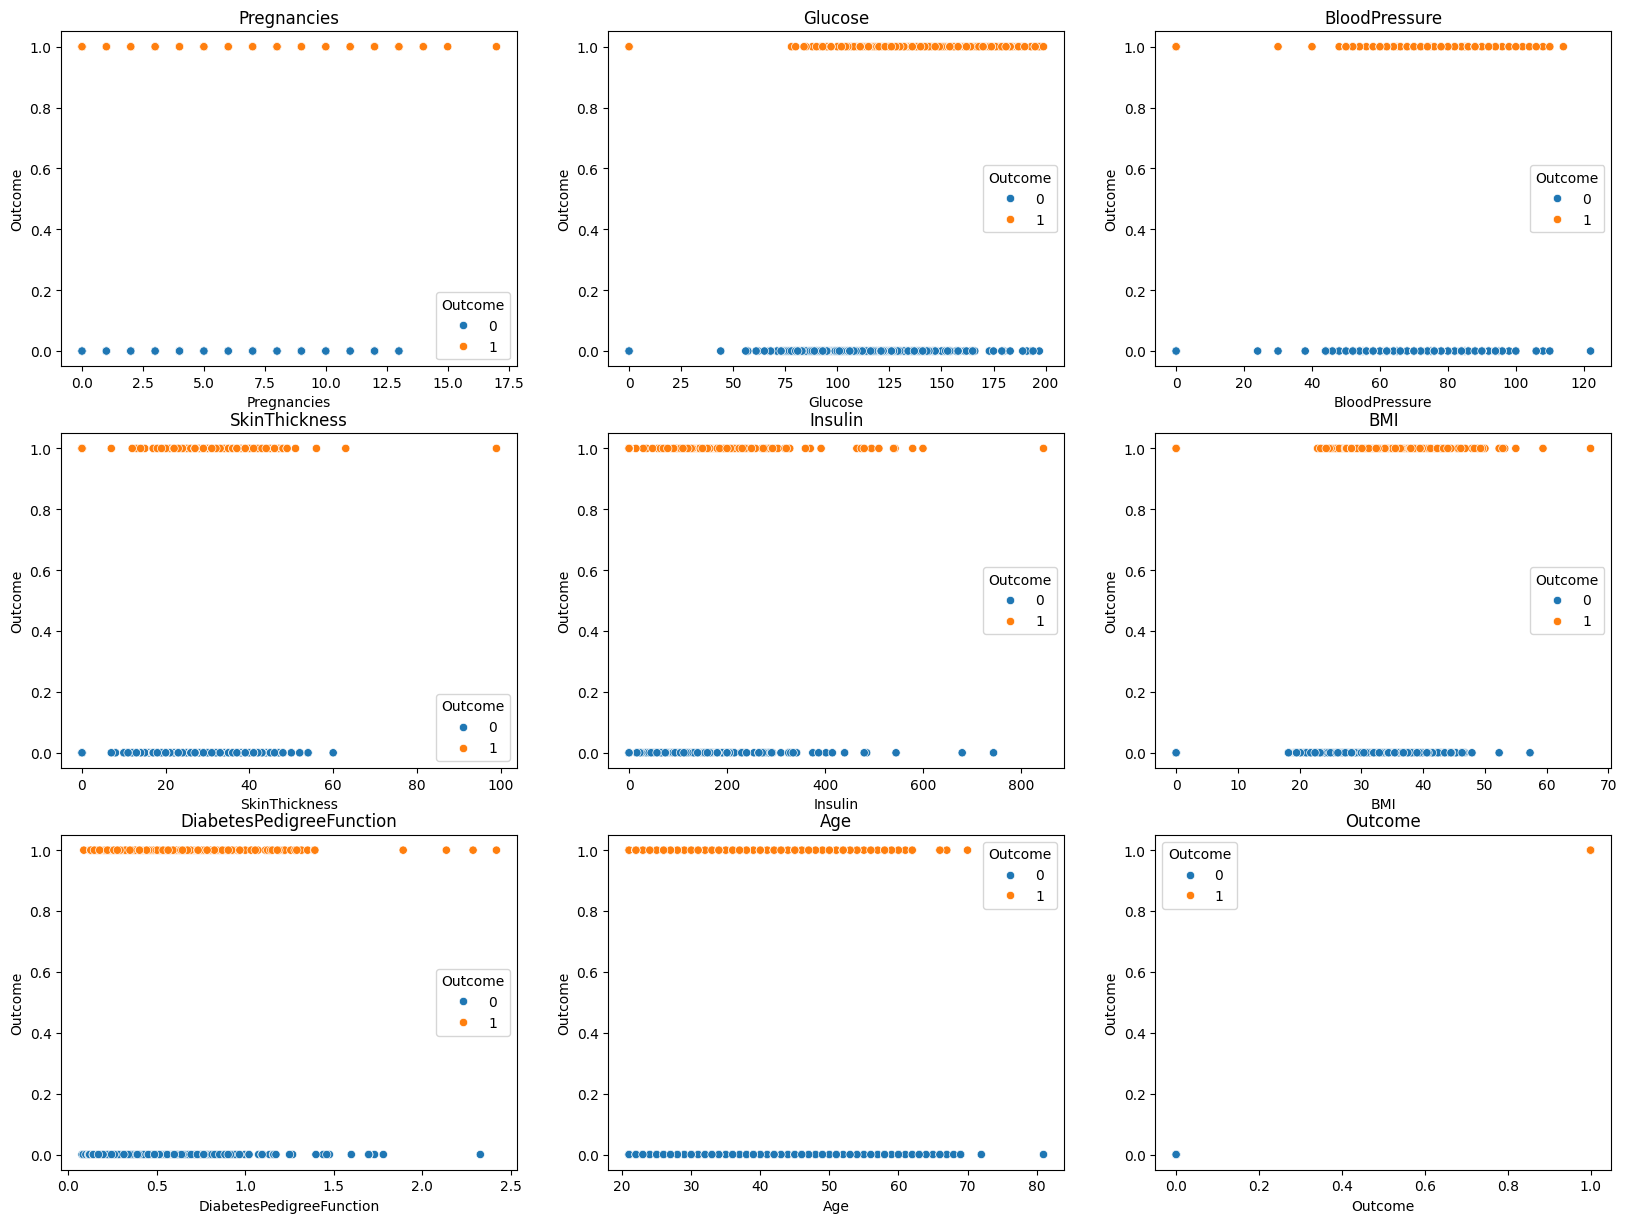

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Number of outliers: 129


In [13]:
pearson_correlation = []
for column in df.columns:
    for other_column in df.columns:
        if column!= other_column:
            correlation_value = df[column].corr(df[other_column])
            pearson_correlation.append((column, other_column, correlation_value))

pearson_correlation_df = pd.DataFrame(pearson_correlation, columns=['Column1', 'Column2', 'Pearson_Correlation'])
display(pearson_correlation_df.sort_values(by='Pearson_Correlation', ascending=False))

heatmap = sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation')
plt.show()

# ### Pairplot
# sns.pairplot(df, hue='Outcome')
# plt.show()

### Boxplot
plt.figure(figsize=(20,20))
for i, column in enumerate(df.columns):
    plt.subplot(4, 3, i+1)
    sns.boxplot(y=df[column], x=df['Outcome'])
    plt.title(column)


### Scatterplot
plt.figure(figsize=(20,20))
for i, column in enumerate(df.columns):
    plt.subplot(4, 3, i+1)
    sns.scatterplot(x=df[column], y=df['Outcome'], hue=df['Outcome'])
    plt.title(column)
plt.show()

### Handling missing values
missing_values = df.isnull().sum()
display(missing_values)

# ### Handling outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = df[((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f'Number of outliers: {len(outliers)}')